# Analyze Wines

In [321]:
# Imports
import pandas as pd
import numpy as np
from datetime import datetime
import requests
import matplotlib.pyplot as plt
import json

### Part 1

In [322]:
regions = pd.read_csv("regions.csv")
print(f"Number of regions(Number of rows): {regions.shape[0]}")

Number of regions(Number of rows): 4353


In [323]:
regions["NomRegion"].values.sort()
regions

,NomRegion
0,Alpes du sud
1,Alpes du sud
2,Alpes du sud
3,Alpes du sud
4,Alsace
...,...
4348,Vins du Monde
4349,Vins du Monde
4350,Vins du Monde
4351,Vins du Monde


In [324]:
# To remove the extra space in the end of the values
regions["NomRegion"] = [" ".join(i.split(" ")[:-1]) if i.endswith(" ") else i for i in regions["NomRegion"]]
# Since "Jura-Savoie" and "Provence-Corse" exist where "-" cannot be replaced with " "
# I do the below specific replaces

replaces = {"Languedoc-Roussillon" : "Languedoc Roussillon",
            "Languedoc" : "Languedoc Roussillon",
            "Sud-Ouest" : "Sud Ouest",
            "Vallée-de-la-Loire" : "Vallée de la Loire",
            "Vallée-du-Rhône" : "Vallée du Rhône",
            "Roussillon" : "Languedoc Roussillon",
            "Jura" : "Jura-Savoie",
            "Savoie" : "Jura-Savoie",
            "Monde" : "Vins du Monde",
            "Provence" : "Provence-Corse",
            "Corse" : "Provence-Corse"}
regions["NomRegion"].replace(replaces, inplace = True)

In [325]:
regions.drop_duplicates(inplace = True)
regions

,NomRegion
0,Alpes du sud
4,Alsace
209,Beaujolais
354,Bordeaux
1375,Bourgogne
1713,Champagne
2065,Provence-Corse
2074,Jura-Savoie
2096,Languedoc Roussillon
2671,Loire


### Part 2

In [326]:
carrefour = pd.read_csv("Carrefour UTF8.csv")
print(f"Names of columns in carrefour dataset = \n{carrefour.columns.values}")

Names of columns in carrefour dataset = 
['Producteur' 'AssemblageCepage' 'Millesime' 'Region' 'Pays' 'Contenance'
 'ContenanceUnit' 'DegreeAlcool' 'appellation' 'CommBouche' 'CommOeil'
 'CommNez' 'CommVin' 'Temperature' 'BestBefore' 'BestAfter' 'Prix'
 'PrixDevise' 'DateCrawl' 'Couleur' 'UrlImage' 'UrlPageVin'
 'UrlSiteSource' 'NomVin']


In [327]:
print(f"Number of Wines = {carrefour.shape[0]}")

Number of Wines = 1000


In [328]:
# Pre Cleaning
carrefour["Region"] = [str(i) for i in carrefour["Region"]]
carrefour["Region"] = [" ".join(i.split(" ")[:-1]) if i.endswith(" ") else i for i in carrefour["Region"]]
carrefour["Region"].replace(replaces, inplace = True)

In [329]:
regions_carrefour = pd.merge(regions, carrefour, how = "inner", left_on="NomRegion", right_on="Region")
regions_carrefour["Site"] = "Carrefour"

In [330]:
# Cleaning the data
# Since I saw all the values in columns of "BestBefore" and "BestAfter" are nan
# I Assume we dont need the "PrixDevise"
regions_carrefour.drop(["PrixDevise", "NomRegion"], inplace=True, axis=1)

In [331]:
# Which varieties of wine are defined ?

# I'm not sure if this is correct
regions_carrefour[regions_carrefour["CommBouche"].notnull()]

,Producteur,AssemblageCepage,Millesime,Region,Pays,Contenance,ContenanceUnit,DegreeAlcool,appellation,CommBouche,...,BestBefore,BestAfter,Prix,DateCrawl,Couleur,UrlImage,UrlPageVin,UrlSiteSource,NomVin,Site
0,La Cave d'Augustin Florent,Riesling (100%),2016,Alsace,France,37.5,cl,12.0,Alsace,Une couleur jaune clair aux reflets verts.,...,NaN,NaN,3.05,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/la-cav...,https://grandsvins.carrefour.fr,"La cave d'Augustin Florent ""riesling"" 2016",Carrefour
1,La Cave d'Augustin Florent,Sylvaner,2017,Alsace,France,75.0,cl,12.0,Alsace,Une jolie couleur or pâle.,...,NaN,NaN,3.50,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/la-cav...,https://grandsvins.carrefour.fr,"La Cave d'Augustin Florent ""Sylvaner"" Blanc 2017",Carrefour
2,Cave de Ribeauvillé,Riesling,2015,Alsace,France,37.5,cl,13.0,Alsace,La robe est d'un jaune brillant aux reflets do...,...,NaN,NaN,4.30,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/consta...,https://grandsvins.carrefour.fr,"Constance Muller Riesling ""Reflets de France"" ...",Carrefour
3,Lucien Edelstein,NaN,2016,Alsace,France,75.0,cl,12.0,Alsace,La robe est d'un jaune pâle et léger.,...,NaN,NaN,4.35,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/lucien...,https://grandsvins.carrefour.fr,"Lucien Edelstein ""Edelzwicker"" 2016",Carrefour
4,Groupe Bestheim,Riesling,2016,Alsace,France,75.0,cl,0.0,Alsace,La robe est d'un jaune pâle brillant et limpide.,...,NaN,NaN,4.65,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/maison...,https://grandsvins.carrefour.fr,Maison Heim Riesling 2016,Carrefour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Les Vins de Vienne,Syrah,2015,Vallée du Rhône,France,75.0,cl,13.0,Saint-Joseph,La robe est d'un rouge sombre aux reflets viol...,...,NaN,NaN,15.95,12/10/2018 00:00,Rouge,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/vins-d...,https://grandsvins.carrefour.fr,"Les Vins de Vienne ""Les Farnauds"" 2015",Carrefour
991,E. Guigal,"Grenache (70%), Syrah (20%), Mourvèdre (10%)",2013,Vallée du Rhône,France,75.0,cl,14.5,Gigondas,Ce vin possède une belle robe pourpre,...,NaN,NaN,17.95,12/10/2018 00:00,Rouge,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/maison...,https://grandsvins.carrefour.fr,"Maison Guigal ""Gigondas"" 2013",Carrefour
992,Maison Guigal,Viognier,2016,Vallée du Rhône,France,75.0,cl,13.0,Saint-Joseph,La robe est d'un jaune pâle aux reflets verts.,...,NaN,NaN,17.95,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/maison...,https://grandsvins.carrefour.fr,"Maison Guigal ""Saint-Joseph"" Blanc 2016",Carrefour
993,E. Guigal,NaN,2014,Vallée du Rhône,France,75.0,cl,14.5,Gigondas,La robe est d'un rouge rubis pourpre.,...,NaN,NaN,17.95,12/10/2018 00:00,Rouge,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/maison...,https://grandsvins.carrefour.fr,"Maison Guigal ""Gigondas"" 2014",Carrefour


In [332]:
# Wines from Burgundy and costing more than €19
regions_carrefour[(regions_carrefour["Region"] == "Bourgogne") & (regions_carrefour["Prix"] > 19)]

,Producteur,AssemblageCepage,Millesime,Region,Pays,Contenance,ContenanceUnit,DegreeAlcool,appellation,CommBouche,...,BestBefore,BestAfter,Prix,DateCrawl,Couleur,UrlImage,UrlPageVin,UrlSiteSource,NomVin,Site
430,Domaine et Château,Pinot noir,2015,Bourgogne,France,75.0,cl,0.0,Pernand-Vergelesses,Une belle robe grenat.,...,NaN,NaN,19.80,12/10/2018 00:00,Rouge,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/75-aoc...,https://grandsvins.carrefour.fr,Domaine Virginie Pillet 2015,Carrefour
431,Maison Louis Latour,Chardonnay (100%),2010,Bourgogne,France,75.0,cl,0.0,Saint-Aubin,Une robe limpide jaune d'or.,...,NaN,NaN,19.90,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/75-aoc...,https://grandsvins.carrefour.fr,Maison Louis Latour 2010,Carrefour
432,Lycée viticole de Beaune,Pinot noir (100%),2016,Bourgogne,France,75.0,cl,0.0,Beaune 1er Cru,La robe est d'un rouge rubis léger.,...,NaN,NaN,19.90,12/10/2018 00:00,Rouge,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/domain...,https://grandsvins.carrefour.fr,Domaine du Clos Saint-Philibert Rouge 2016,Carrefour
433,Jean-Marie Guffens,Chardonnay (100%),2014,Bourgogne,France,75.0,cl,13.0,Pouilly-Fuissé,La robe est jaune claire.,...,NaN,NaN,19.95,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/terres...,https://grandsvins.carrefour.fr,"Maison Verget ""Terres de Pierres"" 2014",Carrefour
434,Famille Bichot,Chardonnay,2016,Bourgogne,France,75.0,cl,13.0,Montagny 1er Cru,Sa couleur est d'un joli jaune clair aux refle...,...,NaN,NaN,19.95,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/jean-b...,https://grandsvins.carrefour.fr,"Jean Bouchard ""Montagny 1er Cru"" Tastevinage b...",Carrefour
435,Jean Bouchard,Pinot noir,2010,Bourgogne,France,75.0,cl,13.0,Savigny-Les-Beaune,Une belle couleur rouge sombre aux reflets rubis.,...,NaN,NaN,19.95,12/10/2018 00:00,Rouge,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/jean-b...,https://grandsvins.carrefour.fr,"Jean Bouchard ""Savigny-Les-Beaune"" rouge bio 2010",Carrefour
436,Jean Bouchard,Pinot noir,2015,Bourgogne,France,75.0,cl,13.0,Fixin,Une robe aux nuances de rubis intense.,...,NaN,NaN,19.95,12/10/2018 00:00,Rouge,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/jean-b...,https://grandsvins.carrefour.fr,"Jean Bouchard ""Fixin"" rouge 2015",Carrefour


In [333]:
# what are the top three most common regions?
regions_carrefour["Region"].value_counts().head(3)

Bordeaux                253
Languedoc Roussillon    149
Bourgogne               121
Name: Region, dtype: int64

In [334]:
# Which query could be executed in order to build this plot?
# Pie Chart
round(regions_carrefour["Region"].value_counts()/len(regions_carrefour["Region"])*100, 2)

Bordeaux                        25.43
Languedoc Roussillon            14.97
Bourgogne                       12.16
Provence-Corse                  11.96
Vallée du Rhône                 10.85
Val de Loire                     7.54
Sud Ouest                        5.63
Alsace                           4.42
Champagne                        2.51
Beaujolais                       1.91
Jura-Savoie                      1.61
Vins du Monde                    0.50
Vallée de la Loire et Centre     0.30
Vallée de la Loire               0.20
Name: Region, dtype: float64

In [335]:
# Which query could be executed in order to build this plot? 
# Histogram plot
regions_carrefour["Region"].value_counts().sort_index().head(12)

Alsace                           44
Beaujolais                       19
Bordeaux                        253
Bourgogne                       121
Champagne                        25
Jura-Savoie                      16
Languedoc Roussillon            149
Provence-Corse                  119
Sud Ouest                        56
Val de Loire                     75
Vallée de la Loire                2
Vallée de la Loire et Centre      3
Name: Region, dtype: int64

In [336]:
#regions_carrefour["Millesime"] = regions_carrefour["Millesime"].apply(lambda x: datetime.now().year if x==0 else x)

In [337]:
regions_carrefour.loc[regions_carrefour["Millesime"] == 0, "Millesime"] = datetime.now().year

In [338]:
for_before_after = ["Bordeaux", "Bourgogne", "Alsace"]
top_3_regions = regions_carrefour[regions_carrefour["Region"].isin(for_before_after)]
top_3_regions

,Producteur,AssemblageCepage,Millesime,Region,Pays,Contenance,ContenanceUnit,DegreeAlcool,appellation,CommBouche,...,BestBefore,BestAfter,Prix,DateCrawl,Couleur,UrlImage,UrlPageVin,UrlSiteSource,NomVin,Site
0,La Cave d'Augustin Florent,Riesling (100%),2016,Alsace,France,37.5,cl,12.0,Alsace,Une couleur jaune clair aux reflets verts.,...,NaN,NaN,3.05,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/la-cav...,https://grandsvins.carrefour.fr,"La cave d'Augustin Florent ""riesling"" 2016",Carrefour
1,La Cave d'Augustin Florent,Sylvaner,2017,Alsace,France,75.0,cl,12.0,Alsace,Une jolie couleur or pâle.,...,NaN,NaN,3.50,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/la-cav...,https://grandsvins.carrefour.fr,"La Cave d'Augustin Florent ""Sylvaner"" Blanc 2017",Carrefour
2,Cave de Ribeauvillé,Riesling,2015,Alsace,France,37.5,cl,13.0,Alsace,La robe est d'un jaune brillant aux reflets do...,...,NaN,NaN,4.30,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/consta...,https://grandsvins.carrefour.fr,"Constance Muller Riesling ""Reflets de France"" ...",Carrefour
3,Lucien Edelstein,NaN,2016,Alsace,France,75.0,cl,12.0,Alsace,La robe est d'un jaune pâle et léger.,...,NaN,NaN,4.35,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/lucien...,https://grandsvins.carrefour.fr,"Lucien Edelstein ""Edelzwicker"" 2016",Carrefour
4,Groupe Bestheim,Riesling,2016,Alsace,France,75.0,cl,0.0,Alsace,La robe est d'un jaune pâle brillant et limpide.,...,NaN,NaN,4.65,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/maison...,https://grandsvins.carrefour.fr,Maison Heim Riesling 2016,Carrefour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,Lycée viticole de Beaune,Pinot noir (100%),2016,Bourgogne,France,75.0,cl,0.0,Beaune 1er Cru,La robe est d'un rouge rubis léger.,...,NaN,NaN,19.90,12/10/2018 00:00,Rouge,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/domain...,https://grandsvins.carrefour.fr,Domaine du Clos Saint-Philibert Rouge 2016,Carrefour
433,Jean-Marie Guffens,Chardonnay (100%),2014,Bourgogne,France,75.0,cl,13.0,Pouilly-Fuissé,La robe est jaune claire.,...,NaN,NaN,19.95,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/terres...,https://grandsvins.carrefour.fr,"Maison Verget ""Terres de Pierres"" 2014",Carrefour
434,Famille Bichot,Chardonnay,2016,Bourgogne,France,75.0,cl,13.0,Montagny 1er Cru,Sa couleur est d'un joli jaune clair aux refle...,...,NaN,NaN,19.95,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/jean-b...,https://grandsvins.carrefour.fr,"Jean Bouchard ""Montagny 1er Cru"" Tastevinage b...",Carrefour
435,Jean Bouchard,Pinot noir,2010,Bourgogne,France,75.0,cl,13.0,Savigny-Les-Beaune,Une belle couleur rouge sombre aux reflets rubis.,...,NaN,NaN,19.95,12/10/2018 00:00,Rouge,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/jean-b...,https://grandsvins.carrefour.fr,"Jean Bouchard ""Savigny-Les-Beaune"" rouge bio 2010",Carrefour


In [339]:
top_3_regions["Region"].unique()

array(['Alsace', 'Bordeaux', 'Bourgogne'], dtype=object)

In [340]:
top_3_regions.loc[top_3_regions["Region"] == "Bordeaux", "BestAfter"] = top_3_regions["Millesime"] + 3
top_3_regions.loc[top_3_regions["Region"] == "Bourgogne", "BestAfter"] = top_3_regions["Millesime"] + 5
top_3_regions.loc[top_3_regions["Region"] == "Alsace", "BestAfter"] = top_3_regions["Millesime"] + 1

top_3_regions.loc[top_3_regions["Region"] == "Bordeaux", "BestBefore"] = top_3_regions["Millesime"] + 7
top_3_regions.loc[top_3_regions["Region"] == "Bourgogne", "BestBefore"] = top_3_regions["Millesime"] + 10
top_3_regions.loc[top_3_regions["Region"] == "Alsace", "BestBefore"] = top_3_regions["Millesime"] + 4

top_3_regions

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Producteur,AssemblageCepage,Millesime,Region,Pays,Contenance,ContenanceUnit,DegreeAlcool,appellation,CommBouche,...,BestBefore,BestAfter,Prix,DateCrawl,Couleur,UrlImage,UrlPageVin,UrlSiteSource,NomVin,Site
0,La Cave d'Augustin Florent,Riesling (100%),2016,Alsace,France,37.5,cl,12.0,Alsace,Une couleur jaune clair aux reflets verts.,...,2020.0,2017.0,3.05,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/la-cav...,https://grandsvins.carrefour.fr,"La cave d'Augustin Florent ""riesling"" 2016",Carrefour
1,La Cave d'Augustin Florent,Sylvaner,2017,Alsace,France,75.0,cl,12.0,Alsace,Une jolie couleur or pâle.,...,2021.0,2018.0,3.50,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/la-cav...,https://grandsvins.carrefour.fr,"La Cave d'Augustin Florent ""Sylvaner"" Blanc 2017",Carrefour
2,Cave de Ribeauvillé,Riesling,2015,Alsace,France,37.5,cl,13.0,Alsace,La robe est d'un jaune brillant aux reflets do...,...,2019.0,2016.0,4.30,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/consta...,https://grandsvins.carrefour.fr,"Constance Muller Riesling ""Reflets de France"" ...",Carrefour
3,Lucien Edelstein,NaN,2016,Alsace,France,75.0,cl,12.0,Alsace,La robe est d'un jaune pâle et léger.,...,2020.0,2017.0,4.35,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/lucien...,https://grandsvins.carrefour.fr,"Lucien Edelstein ""Edelzwicker"" 2016",Carrefour
4,Groupe Bestheim,Riesling,2016,Alsace,France,75.0,cl,0.0,Alsace,La robe est d'un jaune pâle brillant et limpide.,...,2020.0,2017.0,4.65,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/maison...,https://grandsvins.carrefour.fr,Maison Heim Riesling 2016,Carrefour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,Lycée viticole de Beaune,Pinot noir (100%),2016,Bourgogne,France,75.0,cl,0.0,Beaune 1er Cru,La robe est d'un rouge rubis léger.,...,2026.0,2021.0,19.90,12/10/2018 00:00,Rouge,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/domain...,https://grandsvins.carrefour.fr,Domaine du Clos Saint-Philibert Rouge 2016,Carrefour
433,Jean-Marie Guffens,Chardonnay (100%),2014,Bourgogne,France,75.0,cl,13.0,Pouilly-Fuissé,La robe est jaune claire.,...,2024.0,2019.0,19.95,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/terres...,https://grandsvins.carrefour.fr,"Maison Verget ""Terres de Pierres"" 2014",Carrefour
434,Famille Bichot,Chardonnay,2016,Bourgogne,France,75.0,cl,13.0,Montagny 1er Cru,Sa couleur est d'un joli jaune clair aux refle...,...,2026.0,2021.0,19.95,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/jean-b...,https://grandsvins.carrefour.fr,"Jean Bouchard ""Montagny 1er Cru"" Tastevinage b...",Carrefour
435,Jean Bouchard,Pinot noir,2010,Bourgogne,France,75.0,cl,13.0,Savigny-Les-Beaune,Une belle couleur rouge sombre aux reflets rubis.,...,2020.0,2015.0,19.95,12/10/2018 00:00,Rouge,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/jean-b...,https://grandsvins.carrefour.fr,"Jean Bouchard ""Savigny-Les-Beaune"" rouge bio 2010",Carrefour


In [341]:
# Which wines might be drink this year? 
top_3_regions[top_3_regions["BestBefore"]<=datetime.now().year]

,Producteur,AssemblageCepage,Millesime,Region,Pays,Contenance,ContenanceUnit,DegreeAlcool,appellation,CommBouche,...,BestBefore,BestAfter,Prix,DateCrawl,Couleur,UrlImage,UrlPageVin,UrlSiteSource,NomVin,Site
0,La Cave d'Augustin Florent,Riesling (100%),2016,Alsace,France,37.5,cl,12.0,Alsace,Une couleur jaune clair aux reflets verts.,...,2020.0,2017.0,3.05,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/la-cav...,https://grandsvins.carrefour.fr,"La cave d'Augustin Florent ""riesling"" 2016",Carrefour
2,Cave de Ribeauvillé,Riesling,2015,Alsace,France,37.5,cl,13.0,Alsace,La robe est d'un jaune brillant aux reflets do...,...,2019.0,2016.0,4.30,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/consta...,https://grandsvins.carrefour.fr,"Constance Muller Riesling ""Reflets de France"" ...",Carrefour
3,Lucien Edelstein,NaN,2016,Alsace,France,75.0,cl,12.0,Alsace,La robe est d'un jaune pâle et léger.,...,2020.0,2017.0,4.35,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/lucien...,https://grandsvins.carrefour.fr,"Lucien Edelstein ""Edelzwicker"" 2016",Carrefour
4,Groupe Bestheim,Riesling,2016,Alsace,France,75.0,cl,0.0,Alsace,La robe est d'un jaune pâle brillant et limpide.,...,2020.0,2017.0,4.65,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/maison...,https://grandsvins.carrefour.fr,Maison Heim Riesling 2016,Carrefour
6,La Cave d'Augustin Florent,NaN,2016,Alsace,France,75.0,cl,12.5,Alsace,NaN,...,2020.0,2017.0,5.45,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/la-cav...,https://grandsvins.carrefour.fr,"La Cave d'Augustin Florent ""pinot gris"" 2016",Carrefour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,NaN,"Cabernet Franc (10%), Cabernet Sauvignon (15%)...",2011,Bordeaux,France,75.0,cl,13.5,Médoc,Une robe de couleur violet soutenu.,...,2018.0,2014.0,19.95,12/10/2018 00:00,Rouge,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/chatea...,https://grandsvins.carrefour.fr,Château Tour Seran 2011,Carrefour
314,Famille Meyre,"Cabernet Franc (5%), Cabernet Sauvignon (20%),...",2012,Bordeaux,France,150.0,cl,13.5,Haut-Médoc,La robe est d'un rouge assez soutenu.,...,2019.0,2015.0,19.95,12/10/2018 00:00,Rouge,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/chatea...,https://grandsvins.carrefour.fr,Château Bibian Rouge 2012 Magnum,Carrefour
415,Louis Fabrice Latour,Chardonnay (100%),2007,Bourgogne,France,75.0,cl,13.5,Beaune,La robe est dorée.,...,2017.0,2012.0,16.20,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/maison...,https://grandsvins.carrefour.fr,"Maison Louis Latour ""Beaune"" 2007",Carrefour
431,Maison Louis Latour,Chardonnay (100%),2010,Bourgogne,France,75.0,cl,0.0,Saint-Aubin,Une robe limpide jaune d'or.,...,2020.0,2015.0,19.90,12/10/2018 00:00,Blanc,https://res.cloudinary.com/elixup/image/upload...,https://grandsvins.carrefour.fr/product/75-aoc...,https://grandsvins.carrefour.fr,Maison Louis Latour 2010,Carrefour


In [363]:
# Write a function called update_dates( dataframe) which receives a dataframe and udapte 
# “Millesime”, “BestBefore”, “BestAfter” columns 


In [345]:
key = 2

def update_dates(df):
    df.loc[df["millesime"] == 0] = datetime.now().year
    
    df.loc[df["appelation"] == "Bordeaux", "BestAfter"] = df["millesime"] + 3
    df.loc[df["appelation"] == "Bourgogne", "BestAfter"] = df["millesime"] + 5
    df.loc[df["appelation"] == "Alsace", "BestAfter"] = df["millesime"] + 1

    df.loc[df["appelation"] == "Bordeaux", "BestBefore"] = df["millesime"] + 7
    df.loc[df["appelation"] == "Bourgogne", "BestBefore"] = df["millesime"] + 10
    df.loc[df["appelation"] == "Alsace", "BestBefore"] = df["millesime"] + 4

    df.fillna(0, inplace=True)
    df[["BestBefore", "BestAfter"]] = df[["BestBefore", "BestAfter"]].astype(int)
    return df

j = requests.get(f"http://micgiwines2019.azurewebsites.net/api/GetBestWines2019?key=Groupe{key}").json()
temp = pd.DataFrame(j)

update_dates(temp)

,appelation,millesime,percent,BestAfter,BestBefore
0,Bourgogne,2016,5,2021,2026
1,Corse,2016,5,0,0


### Part 3

In [346]:
site = pd.read_csv("Site 4 11 OK.csv")
site["Site"] = "site4"

In [347]:
site.drop(site.columns[[0, 5, 9, 12, 15, 16, 17, 18, 20, 21, 27, 28, 29, 31, 32, 33, 35, 36, 37, 38, 40, 47, 53]], 
          axis = 1, 
          inplace=True)

In [348]:
site.rename({'NomRegion': "Region"}, axis = 1, inplace = True)
site["Region"].replace(replaces, inplace=True)

In [349]:
region_site = pd.merge(regions, site, how="inner", left_on="NomRegion", right_on="Region")

In [350]:
region_site.columns

Index(['NomRegion', 'Id', 'Accords', 'AgeVignes', 'Appellation', 'BestAfter',
       'BestBefore', 'AssemblageCepage', 'Code_ean', 'CommentaireBouche',
       'CommentaireNez', 'CommentaireOeil', 'CommentaireVin', 'Contenance',
       'ContenanceUnit', 'CouleurVin', 'DateCrawl', 'DegreAlcool',
       'ElevageDuree', 'SourceImageBottle', 'AnneeMillesime', 'NomVin',
       'NomPays', 'PotentielGarde', 'PrixVin', 'PrixDevise', 'NomProducteur',
       'Region', 'TempService', 'TypeVin', 'UrlProduit', 'UrlSiteSource',
       'NomVignoble', 'ViticultureLabel', 'Site'],
      dtype='object')

In [351]:
concat = pd.concat([region_site, regions_carrefour])

In [352]:
# What is the percentage of wine present in each data set ?  

In [358]:
round(concat["Site"].value_counts()/len(concat)*100, 2)

site4        65.51
Carrefour    34.49
Name: Site, dtype: float64

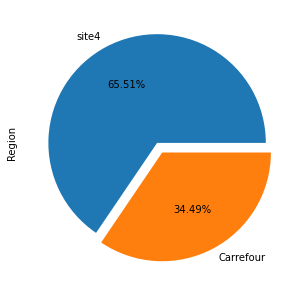

In [362]:
plt.figure(figsize=(5, 5))
plt.pie(x = concat["Site"].value_counts(),
        labels = concat["Site"].value_counts().index,
        autopct = "%.2f%%",
        explode = (0, 0.1))
plt.ylabel('Region')
plt.show()